# Car Make and Model Recognizer
I shall explore here my tries to reach a good optimizer

## Importing Libraries

In [1]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation, PReLU, LeakyReLU
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from glob import glob
from keras import regularizers
from keras.layers.advanced_activations import PReLU
from keras import models
from keras.applications import VGG16

Using TensorFlow backend.


## Pre-Processing

### Data Augmentation

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.25,
                                   rotation_range = 90,
                                   horizontal_flip=True,
                                  validation_split = 0.3)
#test_datagen = ImageDataGenerator(rescale=1./255,
 #                                horizontal_flip = True)

train_data = train_datagen.flow_from_directory('My_Cars/trainCropped',
                                              target_size=(256, 256),
                                              batch_size=32,
                                              class_mode='categorical',
                                              subset='training')
test_data = train_datagen.flow_from_directory('My_Cars/trainCropped',
                                              target_size=(256, 256),
                                              batch_size=32,
                                              class_mode='categorical',
                                            subset='validation')

Found 5796 images belonging to 196 classes.
Found 2348 images belonging to 196 classes.


## Model

In [4]:
model = Sequential()


conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
model.add(conv_base)
model.add(GlobalAveragePooling2D())

model.add(Dense(196, activation='softmax'))
for layer in conv_base.layers:
  layer.trainable = False


model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 8, 8, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 196)               100548    
Total params: 14,815,236
Trainable params: 100,548
Non-trainable params: 14,714,688
_________________________________________________________________


### Train

In [6]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 200

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='Saved_Models/weights.best.from_scratch41.hdf5', 
                               verbose=1, save_best_only=True)

Saving = model.fit_generator(train_data,
          steps_per_epoch=182,  
          epochs=epochs,
          verbose=1, 
          validation_data=test_data,
          validation_steps=74,
          callbacks=[checkpointer])
# model.fit(train_data, test_data,
#                   callbacks = [checkpointer],
#                   validation_split = 0.33,
#                   epochs=epochs,
#           batch_size = 20,
#           verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
182/182 [==============================] - 145s 796ms/step - loss: 5.3324 - acc: 0.0108 - val_loss: 5.2068 - val_acc: 0.0119

Epoch 00001: val_loss improved from inf to 5.20679, saving model to Saved_Models/weights.best.from_scratch41.hdf5
Epoch 2/200
182/182 [==============================] - 137s 753ms/step - loss: 5.1697 - acc: 0.0246 - val_loss: 5.1010 - val_acc: 0.0353

Epoch 00002: val_loss improved from 5.20679 to 5.10096, saving model to Saved_Models/weights.best.from_scratch41.hdf5
Epoch 3/200
182/182 [==============================] - 137s 752ms/step - loss: 5.0514 - acc: 0.0428 - val_loss: 5.0079 - val_acc: 0.0417

Epoch 00003: val_loss improved from 5.10096 to 5.00790, saving model to Saved_Models/weights.best.from_scratch41.hdf5
Epoch 4/200
182/182 [==============================] - 137s 753ms/step - loss: 4.9490 - acc: 0.0572 - val_loss: 4.9326 - val_acc: 0.0639

Epoch 00004: val_loss improved from 5.00790 to 4.9


Epoch 00032: val_loss improved from 3.99059 to 3.94750, saving model to Saved_Models/weights.best.from_scratch41.hdf5
Epoch 33/200
182/182 [==============================] - 136s 748ms/step - loss: 3.5829 - acc: 0.2809 - val_loss: 3.9208 - val_acc: 0.1980

Epoch 00033: val_loss improved from 3.94750 to 3.92081, saving model to Saved_Models/weights.best.from_scratch41.hdf5
Epoch 34/200
182/182 [==============================] - 136s 749ms/step - loss: 3.5532 - acc: 0.2854 - val_loss: 3.9366 - val_acc: 0.1865

Epoch 00034: val_loss did not improve from 3.92081
Epoch 35/200
182/182 [==============================] - 136s 750ms/step - loss: 3.5173 - acc: 0.2957 - val_loss: 3.8924 - val_acc: 0.2019

Epoch 00035: val_loss improved from 3.92081 to 3.89239, saving model to Saved_Models/weights.best.from_scratch41.hdf5
Epoch 36/200
182/182 [==============================] - 136s 748ms/step - loss: 3.5104 - acc: 0.2917 - val_loss: 3.8970 - val_acc: 0.1929

Epoch 00036: val_loss did not improve 

182/182 [==============================] - 136s 749ms/step - loss: 2.9408 - acc: 0.3892 - val_loss: 3.5354 - val_acc: 0.2491

Epoch 00068: val_loss did not improve from 3.52682
Epoch 69/200
182/182 [==============================] - 137s 753ms/step - loss: 2.9539 - acc: 0.3795 - val_loss: 3.5245 - val_acc: 0.2538

Epoch 00069: val_loss improved from 3.52682 to 3.52448, saving model to Saved_Models/weights.best.from_scratch41.hdf5
Epoch 70/200
182/182 [==============================] - 137s 751ms/step - loss: 2.9260 - acc: 0.3863 - val_loss: 3.5150 - val_acc: 0.2449

Epoch 00070: val_loss improved from 3.52448 to 3.51497, saving model to Saved_Models/weights.best.from_scratch41.hdf5
Epoch 71/200
182/182 [==============================] - 137s 751ms/step - loss: 2.9384 - acc: 0.3826 - val_loss: 3.4961 - val_acc: 0.2483

Epoch 00071: val_loss improved from 3.51497 to 3.49613, saving model to Saved_Models/weights.best.from_scratch41.hdf5
Epoch 72/200
182/182 [==============================


Epoch 00106: val_loss improved from 3.30941 to 3.30804, saving model to Saved_Models/weights.best.from_scratch41.hdf5
Epoch 107/200
182/182 [==============================] - 136s 749ms/step - loss: 2.5531 - acc: 0.4445 - val_loss: 3.2838 - val_acc: 0.2785

Epoch 00107: val_loss improved from 3.30804 to 3.28384, saving model to Saved_Models/weights.best.from_scratch41.hdf5
Epoch 108/200
182/182 [==============================] - 136s 748ms/step - loss: 2.5516 - acc: 0.4435 - val_loss: 3.2610 - val_acc: 0.2815

Epoch 00108: val_loss improved from 3.28384 to 3.26099, saving model to Saved_Models/weights.best.from_scratch41.hdf5
Epoch 109/200
182/182 [==============================] - 136s 749ms/step - loss: 2.5418 - acc: 0.4518 - val_loss: 3.2793 - val_acc: 0.2836

Epoch 00109: val_loss did not improve from 3.26099
Epoch 110/200
182/182 [==============================] - 136s 749ms/step - loss: 2.5432 - acc: 0.4426 - val_loss: 3.2786 - val_acc: 0.2849

Epoch 00110: val_loss did not impr

182/182 [==============================] - 137s 752ms/step - loss: 2.3113 - acc: 0.4835 - val_loss: 3.1954 - val_acc: 0.2934

Epoch 00146: val_loss did not improve from 3.12849
Epoch 147/200
182/182 [==============================] - 136s 750ms/step - loss: 2.2748 - acc: 0.4967 - val_loss: 3.1604 - val_acc: 0.3049

Epoch 00147: val_loss did not improve from 3.12849
Epoch 148/200
182/182 [==============================] - 136s 746ms/step - loss: 2.3054 - acc: 0.4837 - val_loss: 3.1361 - val_acc: 0.3066

Epoch 00148: val_loss did not improve from 3.12849
Epoch 149/200
182/182 [==============================] - 137s 751ms/step - loss: 2.2901 - acc: 0.4966 - val_loss: 3.1518 - val_acc: 0.3173

Epoch 00149: val_loss did not improve from 3.12849
Epoch 150/200
182/182 [==============================] - 136s 750ms/step - loss: 2.2900 - acc: 0.4912 - val_loss: 3.1702 - val_acc: 0.3020

Epoch 00150: val_loss did not improve from 3.12849
Epoch 151/200
182/182 [==============================] - 13

182/182 [==============================] - 137s 751ms/step - loss: 2.1007 - acc: 0.5182 - val_loss: 3.0676 - val_acc: 0.3164

Epoch 00187: val_loss did not improve from 3.03741
Epoch 188/200
182/182 [==============================] - 136s 750ms/step - loss: 2.0857 - acc: 0.5245 - val_loss: 3.0261 - val_acc: 0.3190

Epoch 00188: val_loss improved from 3.03741 to 3.02613, saving model to Saved_Models/weights.best.from_scratch41.hdf5
Epoch 189/200
182/182 [==============================] - 137s 751ms/step - loss: 2.0804 - acc: 0.5333 - val_loss: 3.0217 - val_acc: 0.3322

Epoch 00189: val_loss improved from 3.02613 to 3.02173, saving model to Saved_Models/weights.best.from_scratch41.hdf5
Epoch 190/200
182/182 [==============================] - 136s 749ms/step - loss: 2.0750 - acc: 0.5290 - val_loss: 3.0352 - val_acc: 0.3284

Epoch 00190: val_loss did not improve from 3.02173
Epoch 191/200
182/182 [==============================] - 137s 750ms/step - loss: 2.0994 - acc: 0.5163 - val_loss: 3.

In [7]:

vals = pd.DataFrame.from_dict(Saving.history)
vals = pd.concat([pd.Series(range(0,100),name='epochs'),vals],axis=1)
vals.head(n=31)

,epochs,val_loss,val_acc,loss,acc
0,0.0,5.206788,0.011925,5.331750,0.010870
1,1.0,5.100963,0.035349,5.169210,0.024672
2,2.0,5.007896,0.041738,5.053302,0.042961
3,3.0,4.932577,0.063884,4.947638,0.057453
4,4.0,4.866229,0.065588,4.856010,0.071429
5,5.0,4.799258,0.082198,4.767892,0.082471
6,6.0,4.732639,0.086457,4.681987,0.097999
7,7.0,4.687869,0.084327,4.615279,0.108868
8,8.0,4.628386,0.101789,4.540442,0.122498
9,9.0,4.577025,0.102215,4.471795,0.128192


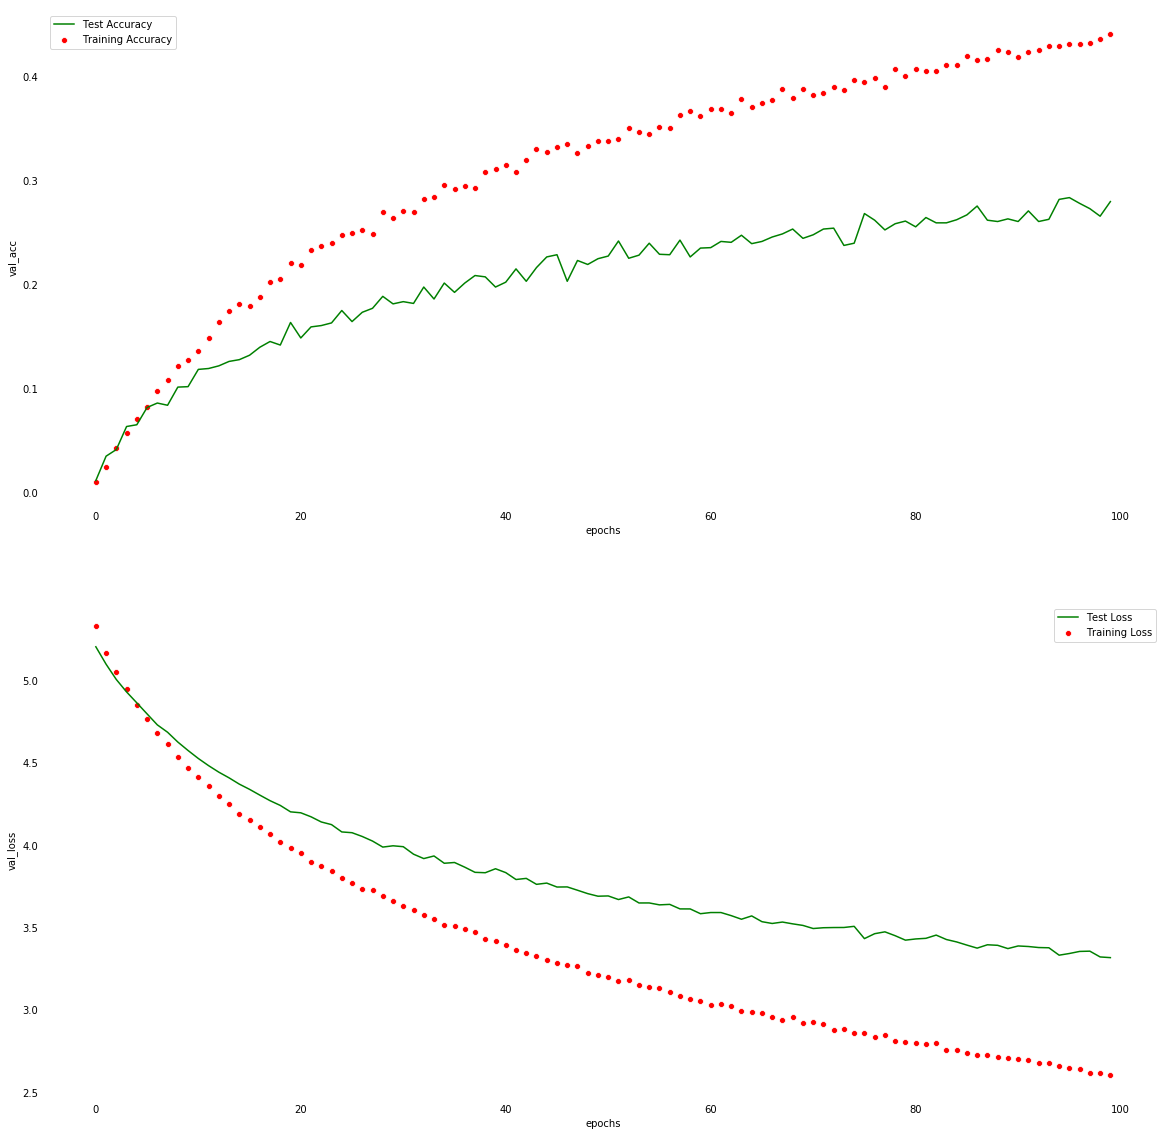

In [8]:
import seaborn as sns
sns.set_style({'xtick.bottom':False,
               'ytick.left':False,
               'axes.spines.bottom': False,
               'axes.spines.left': False,
               'axes.spines.right': False,
               'axes.spines.top': False})

ig,(ax,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(20,20))
sns.scatterplot(x='epochs',y='acc',data=vals,ax=ax,color='r')
sns.lineplot(x='epochs',y='val_acc',data=vals,ax=ax,color='g')
sns.scatterplot(x='epochs',y='loss',data=vals,ax=ax1,color='r')
sns.lineplot(x='epochs',y='val_loss',data=vals,ax=ax1,color='g')
ax.legend(labels=['Test Accuracy','Training Accuracy'])
ax1.legend(labels=['Test Loss','Training Loss'])

In [ ]:
# for i in range(n_iterations):
#         print('\r{}/{}'. format(i, n_iterations))
#         #initilaize random hyperparameters
#         random_parameters = {K: random.sample(V, 1)[0] for K, V in parameters_grid.items()}
#         #create model with random hyperparameters
#         model = create_model(random_parameters)
#         opt = create_RMSprop_optimizer(random_parameters)
#         #compile model
#         model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])
#         #train model
#         epochs = 40
#         checkpointer = ModelCheckpoint(filepath='saved_models/model_weights.hdf5', verbose=1, save_best_only=True)
#         early_stopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 8)
#         history = model.fit(X_train, Y_train,
#                   callbacks = [checkpointer, early_stopping],
#                   validation_split = 0.33,
#                   epochs=epochs, batch_size = 20, verbose=1)
#         #compare current min validation loss with global min validation loss
#         current_min_val_loss = np.min(history.history['val_loss'])
#         if(current_min_val_loss < global_min_val_loss):
#             global_min_val_loss = current_min_val_loss
#             #save the best model so far
#             model.load_weights('saved_models/model_weights.hdf5')
#             model.save('saved_models/best_model.h5')
#             print('saving new best model, val_loss = {}'.format(current_min_val_loss))
#             #save best hyperparameters
#             best_hyperparameters = random_parameters